In [39]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [40]:
dataset_path = '/kaggle/input/crop-dataset-augmented/dataset-augmented2'

In [41]:
def load_dataset(dataset_path):
    data = []
    labels = []

    # Iterate through each class in the dataset
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Check if the item is a directory
        if os.path.isdir(class_path):
            # Iterate through each image in the class folder
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)

                # Resize the image to a common size (e.g., 224x224)
                img = cv2.resize(img, (224, 224))

                data.append(img)
                labels.append(class_folder)

    return np.array(data), np.array(labels)


In [42]:
data, labels = load_dataset(dataset_path)

In [43]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)


In [45]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [46]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)


In [47]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)


In [48]:
knn_classifier.fit(X_train_flatten, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn_classifier.predict(X_test_flatten)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 12.92%


In [51]:
class_names = label_encoder.classes_
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
                     precision    recall  f1-score   support

             Cherry       0.50      0.20      0.29         5
       Coffee-plant       0.00      0.00      0.00         8
           Cucumber       0.00      0.00      0.00        11
   Fox_nut(Makhana)       0.11      0.57      0.18         7
              Lemon       0.00      0.00      0.00         7
         Olive-tree       0.06      0.43      0.11         7
Pearl_millet(bajra)       0.21      0.38      0.27         8
      Tobacco-plant       0.33      0.09      0.14        11
             almond       0.14      0.12      0.13         8
             banana       0.00      0.00      0.00        10
           cardamom       0.00      0.00      0.00         7
             chilli       0.42      0.50      0.45        10
              clove       0.00      0.00      0.00         9
            coconut       0.00      0.00      0.00        10
             cotton       0.00      0.00      0.00         9


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


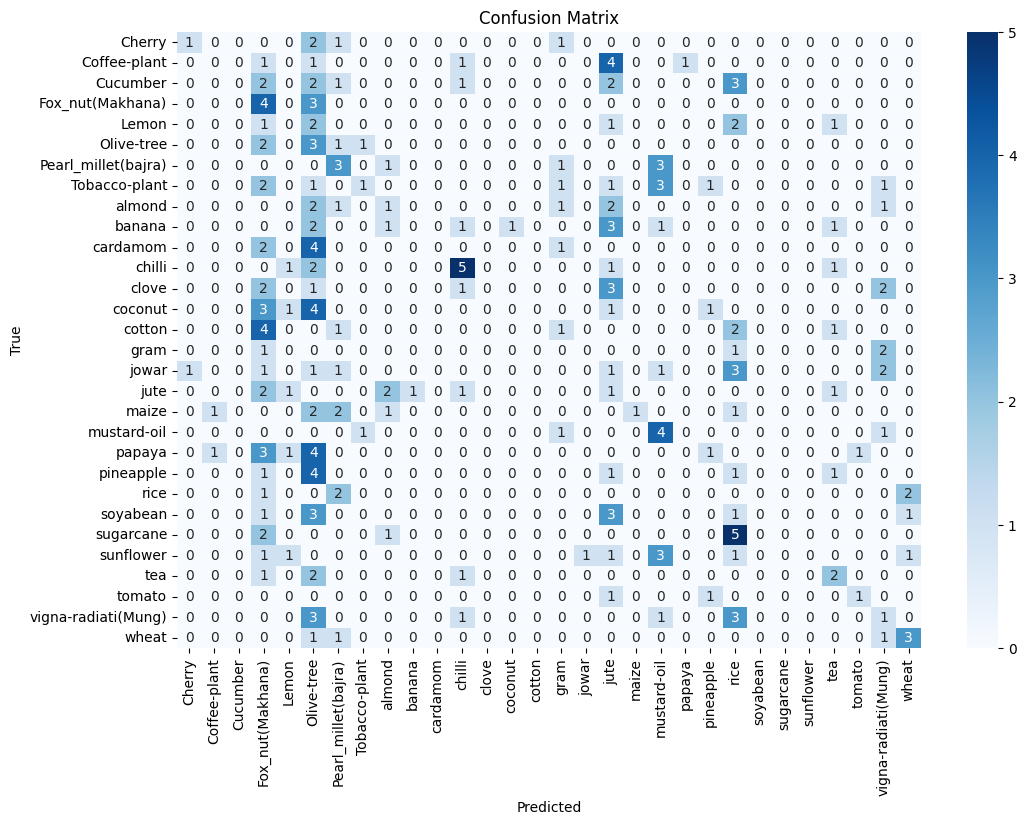

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

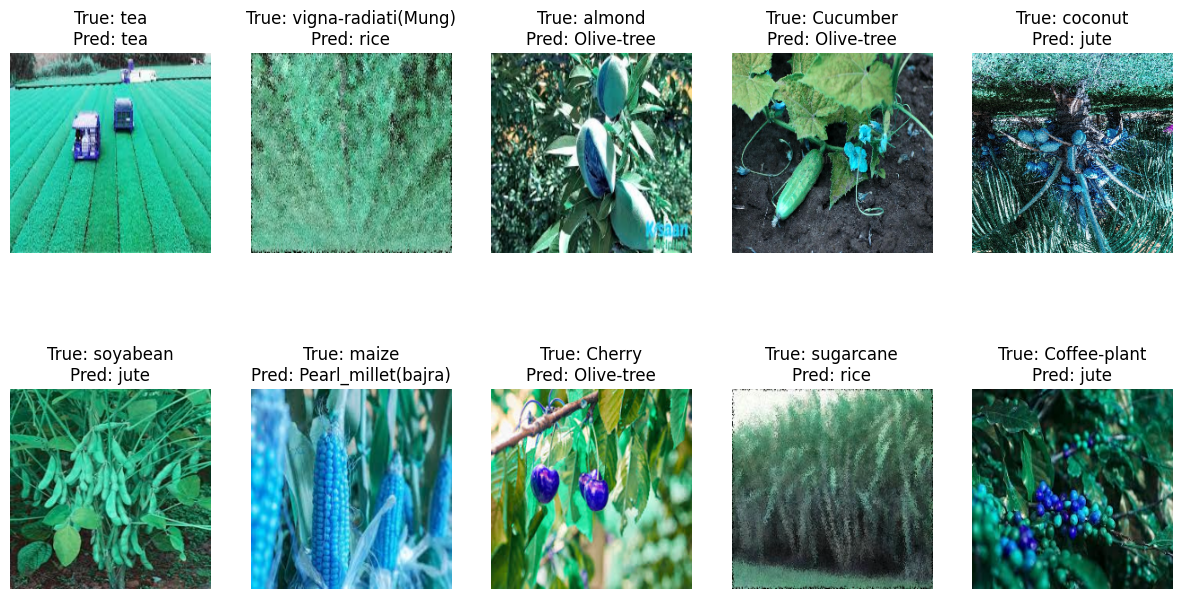

In [53]:
sample_indices = np.random.choice(range(len(X_test)), size=10, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(X_test[idx])
    true_label = label_encoder.inverse_transform([y_test[idx]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[idx]])[0]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

plt.show()

In [54]:
# Example: Standardization (mean=0, std=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}


In [56]:
# Create a KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Fit the classifier on the training data
best_knn_classifier.fit(X_train_scaled, y_train)

# Evaluate on the test set
accuracy = best_knn_classifier.score(X_test_scaled, y_test)
print("Test Set Accuracy:", accuracy)


Test Set Accuracy: 0.22083333333333333


In [57]:
from sklearn.model_selection import GridSearchCV

# Define a new set of hyperparameters to explore
fine_tune_param_grid = {'n_neighbors': [2, 3, 4], 'metric': ['manhattan'], 'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Use GridSearchCV for fine-tuning
fine_tune_grid_search = GridSearchCV(knn_classifier, fine_tune_param_grid, cv=3)
fine_tune_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters after fine-tuning
print("Best Parameters after Fine-Tuning:", fine_tune_grid_search.best_params_)

# Evaluate the fine-tuned model on the test set
best_knn_classifier_fine_tuned = fine_tune_grid_search.best_estimator_
accuracy_fine_tuned = best_knn_classifier_fine_tuned.score(X_test_scaled, y_test)
print("Test Set Accuracy after Fine-Tuning:", accuracy_fine_tuned)


Best Parameters after Fine-Tuning: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Test Set Accuracy after Fine-Tuning: 0.35833333333333334


In [58]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)


Cross-Validation Scores: [0.19791667 0.140625   0.171875   0.15625    0.10416667]
